In [21]:
import sys
sys.path.append("../..")
from IPython.display import display
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import magine.ontology.enrichment_tools as et
from magine.plotting.heatmaps import  heatmap_from_array
from magine.plotting.wordcloud_tools import create_wordcloud
from magine.plotting.venn_diagram_maker import create_venn2
from magine.plotting.species_plotting import plot_list_of_genes
import magine.data.tools as tools
import magine.networks.visualization.notebook_tools as nt
import magine.networks.visualization.notebooks.view as view
from magine.networks.network_subgraphs import NetworkSubgraphs

# Exploring enrichment output

Here we load in the results from enrichR

In [2]:
enrichment_array = pd.read_csv('Data/cisplatin_enrichment.csv.gz', index_col=0)

enrichment_array['significant_flag'] = False
enrichment_array.loc[enrichment_array['adj_p_value']<=0.05, 'significant_flag'] = True

## Data stats

In [3]:
display(enrichment_array.dtypes)
display(enrichment_array['db'].unique())

term_name            object
rank                  int64
combined_score      float64
adj_p_value         float64
genes                object
n_genes               int64
sample_id            object
category             object
db                   object
significant_flag       bool
dtype: object

array(['KEGG_2016', 'NCI-Nature_2016', 'Panther_2016',
       'WikiPathways_2016', 'BioCarta_2016', 'Humancyc_2016',
       'Reactome_2016', 'KEA_2015', 'GO_Biological_Process_2017',
       'GO_Molecular_Function_2017', 'GO_Cellular_Component_2017',
       'ChEA_2016', 'TRANSFAC_and_JASPAR_PWMs', 'ENCODE_TF_ChIP-seq_2015',
       'Kinase_Perturbations_from_GEO_down',
       'Kinase_Perturbations_from_GEO_up',
       'LINCS_L1000_Kinase_Perturbations_down',
       'LINCS_L1000_Kinase_Perturbations_up',
       'Ligand_Perturbations_from_GEO_down',
       'Ligand_Perturbations_from_GEO_up', 'DrugMatrix',
       'Drug_Perturbations_from_GEO_2014'], dtype=object)

In [4]:
word_cloud = create_wordcloud(enrichment_array)

In [5]:
# We can use et.filter_dataframe to select which data to look at

reactome_only = et.filter_dataframe(enrichment_array, 
                                    p_value=0.05, # only sig pvalues
                                    combined_score=0.0, # score threshold of positive values 
                                    db='Reactome_2016', # Only reactome db
                                    category='proteomics_up', # from this category
                                   )
print(reactome_only.shape)

(574, 10)


In [6]:
cols = ['term_name', 'combined_score', 'n_genes', 'genes', 'rank']
display(reactome_only[cols].head(15))

,term_name,combined_score,n_genes,genes,rank
257058,Processing of Capped Intron-Containing Pre-mRN...,116.207435,48,"DDX39B,DHX9,FUS,HNRNPA0,HNRNPA1,HNRNPA2B1,HNRN...",1
233500,Processing of Capped Intron-Containing Pre-mRN...,106.902995,46,"CPSF1,CSTF1,CWC15,EFTUD2,EIF4A3,FIP1L1,FUS,HNR...",1
233501,Gene Expression_hsa,102.139686,152,"AIMP2,ANP32A,ATF2,ATR,BNIP3L,BOP1,C2ORF49,CD3E...",2
257059,mRNA Splicing - Major Pathway_hsa,94.852616,38,"DHX9,FUS,HNRNPA0,HNRNPA1,HNRNPA2B1,HNRNPA3,HNR...",2
257060,Gene Expression_hsa,92.138380,147,"ANP32A,APEH,BAZ1B,BDP1,BOP1,CD3EAP,CD44,CDK12,...",3
257061,mRNA Splicing_hsa,90.060106,38,"DHX9,FUS,HNRNPA0,HNRNPA1,HNRNPA2B1,HNRNPA3,HNR...",4
257062,Metabolism of proteins_hsa,82.654616,108,"APEH,APOA1,ARF4,ATP5A1,ATP5B,CALR,CANX,CD59,CK...",5
233502,mRNA Splicing - Major Pathway_hsa,72.889668,33,"CPSF1,CSTF1,CWC15,EFTUD2,EIF4A3,FIP1L1,FUS,HNR...",3
233503,mRNA Splicing_hsa,68.905457,33,"CPSF1,CSTF1,CWC15,EFTUD2,EIF4A3,FIP1L1,FUS,HNR...",4
233504,Cell Cycle_hsa,62.048920,62,"AKAP9,ATR,BANF1,CEP131,CNTRL,DIDO1,DKC1,DYNC1H...",5


,rank,combined_score,adj_p_value,n_genes
count,574.000000,574.000000,5.740000e+02,574.000000
mean,81.846690,16.500834,8.950119e-03,18.639373
std,54.162649,15.379404,1.152822e-02,15.322271
min,1.000000,0.147839,4.385462e-21,4.000000
25%,36.250000,6.666965,1.546016e-04,10.000000
50%,72.500000,12.201471,3.365609e-03,15.000000
75%,123.750000,22.095435,1.524246e-02,22.000000
max,194.000000,116.207435,4.930488e-02,152.000000


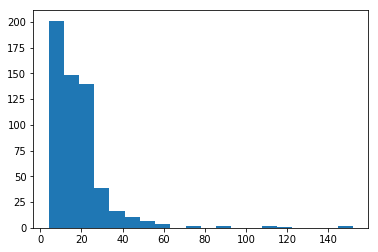

In [7]:
plt.hist(reactome_only['n_genes'], bins=20)
display(reactome_only.describe())

In [8]:
display(reactome_only.sort_values('n_genes', ascending=False)[cols].head(20))

,term_name,combined_score,n_genes,genes,rank
233501,Gene Expression_hsa,102.139686,152,"AIMP2,ANP32A,ATF2,ATR,BNIP3L,BOP1,C2ORF49,CD3E...",2
257060,Gene Expression_hsa,92.138380,147,"ANP32A,APEH,BAZ1B,BDP1,BOP1,CD3EAP,CD44,CDK12,...",3
257106,Metabolism_hsa,19.907112,118,"ABCC1,ACAA1,AKR1B15,ALB,ALDOA,APOA1,APOC3,APOE...",49
233599,Metabolism_hsa,10.043559,109,"AASDHPPT,ABCA1,ABCC1,ACACA,ACLY,ADO,AGPS,AIMP2...",100
257062,Metabolism of proteins_hsa,82.654616,108,"APEH,APOA1,ARF4,ATP5A1,ATP5B,CALR,CANX,CD59,CK...",5
257173,Immune System_hsa,8.309495,91,"ACTR3,AP2B1,ARPC1A,ATP6V0A1,ATP6V1G1,BAD,C4A,C...",116
210798,Gene Expression_hsa,55.510780,91,"AEBP2,ANP32A,ATF2,ATR,BMS1,BOP1,CPSF2,CPSF3,DA...",1
233569,Metabolism of proteins_hsa,18.284189,75,"ADD1,CALR,CANX,CCT3,CCT6A,CD59,COPA,DPH1,DYNC1...",70
257063,Disease_hsa,56.883870,71,"ALB,AP2B1,APC,BAD,BANF1,CALR,CANX,CD9,CHMP7,CT...",6
233529,Disease_hsa,34.187548,63,"ACACA,BAD,BANF1,CALR,CANX,CLTA,CNTRL,EEF2,EGFR...",30


In [9]:
# Manually select terms with large number of genes that are not useful.
# This is based on person intuition. "Gene expression" and "metabolism" might be useful for some, but 
# here I will elimate as they are not descriptive enough to explain what the drug is doing.

not_useful = ['Gene Expression_hsa', 'Metabolism_hsa',
              'Disease_hsa', 'Metabolism of proteins_hsa',
              'Developmental Biology_hsa', 'Infectious disease_hsa'
             ]
reactome_only = reactome_only[~reactome_only['term_name'].isin(not_useful)]

display(reactome_only.sort_values('n_genes', ascending=False)[cols].head(15))

,term_name,combined_score,n_genes,genes,rank
257173,Immune System_hsa,8.309495,91,"ACTR3,AP2B1,ARPC1A,ATP6V0A1,ATP6V1G1,BAD,C4A,C...",116
233504,Cell Cycle_hsa,62.048920,62,"AKAP9,ATR,BANF1,CEP131,CNTRL,DIDO1,DKC1,DYNC1H...",5
257065,Hemostasis_hsa,52.388225,60,"ACTN1,ACTN4,AHSG,ALB,ALDOA,APOA1,APOH,ATP1B1,B...",8
257068,Post-translational protein modification_hsa,48.625261,56,"ARF4,CALR,CANX,CD59,COPA,COPG2,DAD1,DDOST,DERL...",11
257066,Vesicle-mediated transport_hsa,50.489896,55,"ALB,APOA1,APOE,ARF4,CALR,CD59,CHMP7,COPA,COPG2...",9
257171,Innate Immune System_hsa,8.338469,53,"ACTR3,ARPC1A,BAD,C4A,C9,CD59,CFH,CFI,CTNNB1,DA...",114
257080,Cell Cycle_hsa,32.746097,51,"BANF1,BRCA2,CDK4,DKC1,EMD,GORASP2,KIF23,LEMD3,...",23
233509,"Cell Cycle, Mitotic_hsa",50.941077,51,"AKAP9,BANF1,CEP131,CNTRL,DYNC1H1,EMD,ERCC6L,GO...",10
257058,Processing of Capped Intron-Containing Pre-mRN...,116.207435,48,"DDX39B,DHX9,FUS,HNRNPA0,HNRNPA1,HNRNPA2B1,HNRN...",1
257072,Membrane Trafficking_hsa,42.054148,47,"ARF4,CD59,CHMP7,COPA,COPG2,EXOC3,EXOC7,FTH1,FT...",15


In [10]:
# Now lets look at the first time point. 

test_df = et.filter_dataframe(reactome_only, sample_id='01hr')
display(test_df.head(15)[cols])
print(test_df.shape)

,term_name,combined_score,n_genes,genes,rank
189000,Cell Cycle_hsa,36.507320,28,"ACD,AKAP9,BRCA1,CDC16,CDC20,CDC7,CLASP2,DCTN1,...",1
189001,Interleukin-2 signaling_hsa,30.220851,16,"AKAP9,BRAF,CNKSR2,CUL3,HAVCR2,INPPL1,IRS2,MAPK...",2
189002,"Interleukin-3, 5 and GM-CSF signaling_hsa",29.303950,16,"AKAP9,BRAF,CNKSR2,CUL3,INPPL1,IRS2,MAPK3,MARK3...",3
189003,"Cell Cycle, Mitotic_hsa",27.727089,22,"AKAP9,CDC16,CDC20,CDC7,CLASP2,DCTN1,HAUS8,HDAC...",4
189004,Interleukin receptor SHC signaling_hsa,27.242088,15,"AKAP9,BRAF,CNKSR2,CUL3,INPPL1,IRS2,MAPK3,MARK3...",5
189005,MAPK family signaling cascades_hsa,26.440058,16,"AKAP9,BRAF,CNKSR2,CUL3,DNAJB1,IRS2,MAPK3,MARK3...",6
189006,Signaling by FGFR2_hsa,25.922377,18,"AKAP9,BRAF,CNKSR2,CUL3,HNRNPA1,HNRNPM,INSR,IRS...",7
189007,Insulin receptor signalling cascade_hsa,25.791980,16,"AKAP9,BRAF,CNKSR2,CUL3,INSR,IRS2,MAPK3,MARK3,P...",8
189008,Signalling by NGF_hsa,25.783068,21,"AKAP13,AKAP9,ARHGEF16,BRAF,CNKSR2,CUL3,HDAC1,I...",9
189009,Signaling by Interleukins_hsa,24.453083,19,"AKAP9,BRAF,CNKSR2,CUL3,HAVCR2,INPPL1,IRS2,MAP3...",10


(76, 10)


There are 76 enriched terms. If we look at the top ranked terms, we see that some fo them have similar descriptions "Interlekin...". If we look at the gene list, we can also see that some of the genes are similar. To see if there are redundant terms that are enriched, we can calculate their similarity with the Jaccard Index. 

In [12]:
# et.find_similar_terms calculate the Jaccard Index and returns a ranked dataframe of terms and scores.
# Higher scores means more similar terms
d = et.find_similar_terms('Cell Cycle_hsa', test_df)
display(d.head(10))

d = et.find_similar_terms('Interleukin-2 signaling_hsa', test_df)
display(d.head(10))

d = et.find_similar_terms('MAPK family signaling cascades_hsa', test_df)
display(d.head(10))

,term_name,similarity_score
2,"Cell Cycle, Mitotic_hsa",0.785714
70,Meiotic synapsis_hsa,0.178571
60,SUMO E3 ligases SUMOylate target proteins_hsa,0.166667
63,SUMOylation_hsa,0.166667
65,Signaling by Rho GTPases_hsa,0.166667
58,Immune System_hsa,0.126984
57,Cytokine Signaling in Immune system_hsa,0.111111
4,MAPK family signaling cascades_hsa,0.073171
1,"Interleukin-3, 5 and GM-CSF signaling_hsa",0.073171
8,Signaling by Interleukins_hsa,0.068182


,term_name,similarity_score
3,Interleukin receptor SHC signaling_hsa,0.937500
1,"Interleukin-3, 5 and GM-CSF signaling_hsa",0.882353
19,FRS-mediated FGFR2 signaling_hsa,0.875000
14,GRB2 events in EGFR signaling_hsa,0.875000
24,MAPK1/MAPK3 signaling_hsa,0.875000
23,Signalling to p38 via RIT and RIN_hsa,0.875000
22,Frs2-mediated activation_hsa,0.875000
21,ARMS-mediated activation_hsa,0.875000
27,Signalling to RAS_hsa,0.875000
28,VEGFR2 mediated cell proliferation_hsa,0.875000


,term_name,similarity_score
19,FRS-mediated FGFR2 signaling_hsa,0.875
12,SOS-mediated signalling_hsa,0.875
21,ARMS-mediated activation_hsa,0.875
24,MAPK1/MAPK3 signaling_hsa,0.875
25,Prolonged ERK activation events_hsa,0.875
18,FRS-mediated FGFR3 signaling_hsa,0.875
17,SHC1 events in EGFR signaling_hsa,0.875
16,FRS-mediated FGFR4 signaling_hsa,0.875
15,FRS-mediated FGFR1 signaling_hsa,0.875
14,GRB2 events in EGFR signaling_hsa,0.875


We can do this for all terms and view the results in a distance matrix.

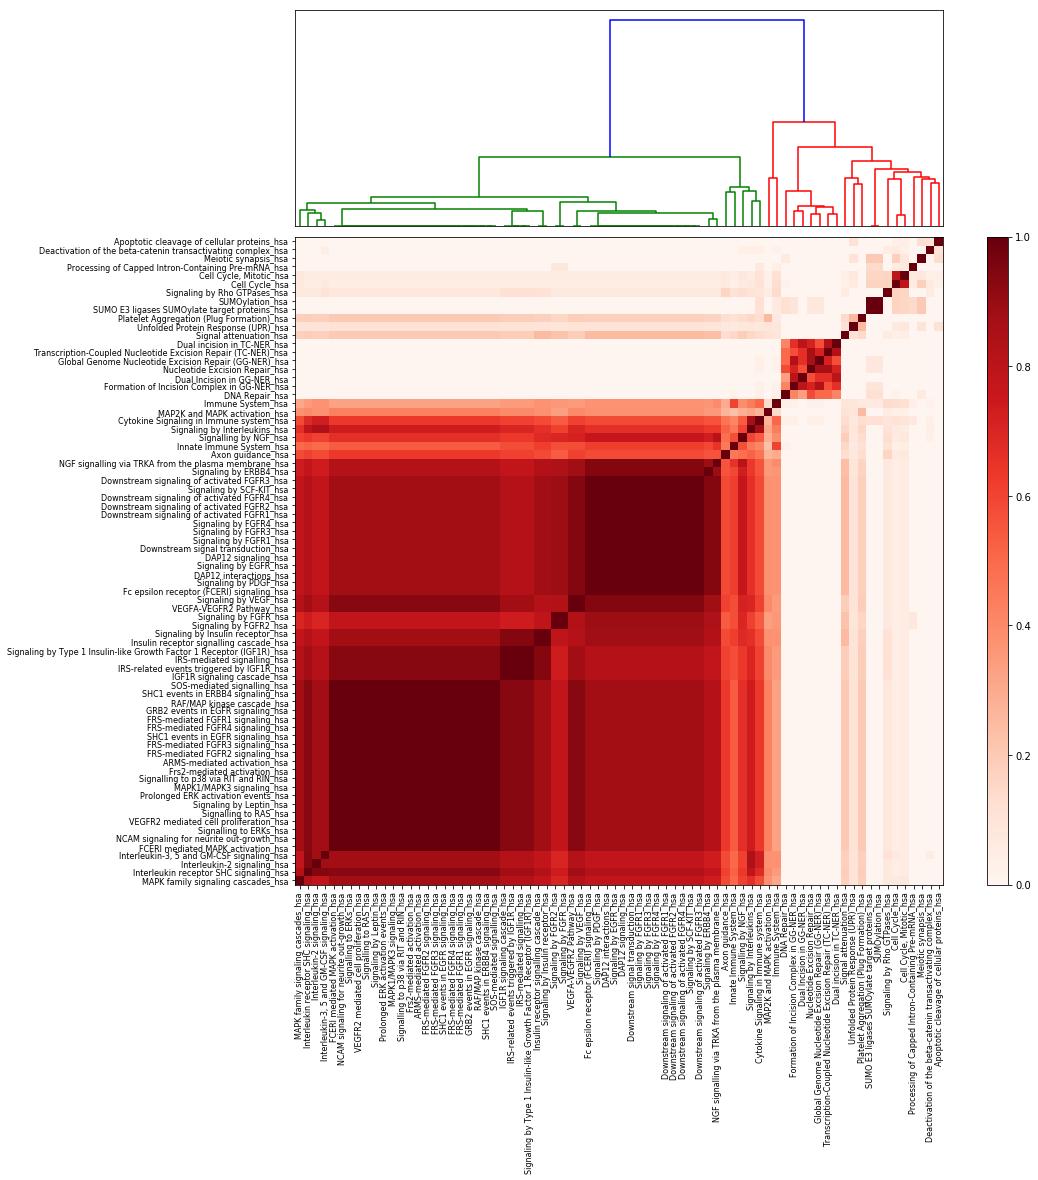

In [13]:
et.dist_matrix(test_df, fig_size=(15,15));

The dark red represents terms that are highly similar. We can filter all highly similar terms from the matrix.

In [14]:
test_df1 = et.filter_similar_terms(test_df, threshold=.9)

Number of rows went from 76 to 20


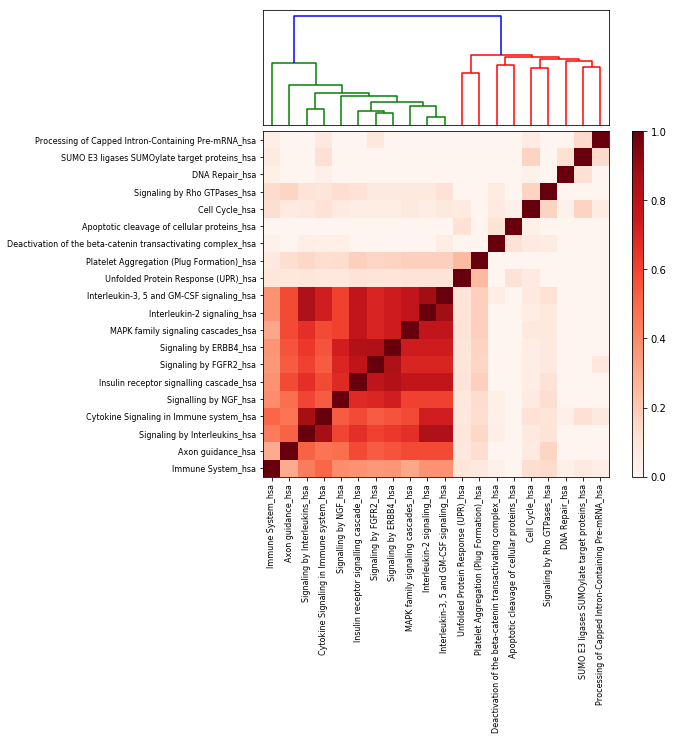

In [15]:
et.dist_matrix(test_df1);

Number of rows went from 76 to 14


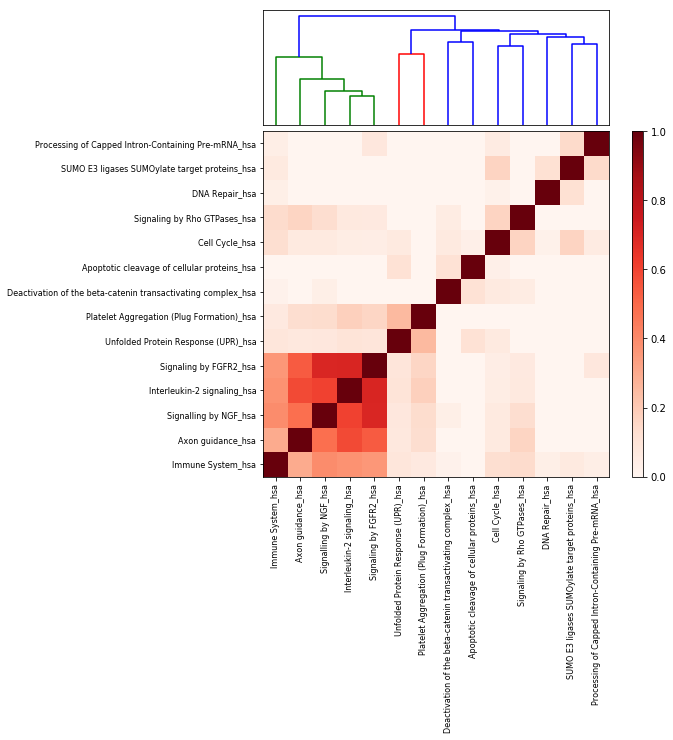

In [16]:
test_df2 = et.filter_similar_terms(test_df, threshold=.7)
et.dist_matrix(test_df2);

In [17]:
display(test_df2[cols].head(15))

,term_name,combined_score,n_genes,genes,rank
189000,Cell Cycle_hsa,36.507320,28,"ACD,AKAP9,BRCA1,CDC16,CDC20,CDC7,CLASP2,DCTN1,...",1
189001,Interleukin-2 signaling_hsa,30.220851,16,"AKAP9,BRAF,CNKSR2,CUL3,HAVCR2,INPPL1,IRS2,MAPK...",2
189006,Signaling by FGFR2_hsa,25.922377,18,"AKAP9,BRAF,CNKSR2,CUL3,HNRNPA1,HNRNPM,INSR,IRS...",7
189008,Signalling by NGF_hsa,25.783068,21,"AKAP13,AKAP9,ARHGEF16,BRAF,CNKSR2,CUL3,HDAC1,I...",9
189032,Axon guidance_hsa,20.509597,22,"AKAP9,ARPC1A,BRAF,CLASP2,CLTCL1,CNKSR2,CRMP1,C...",33
189056,Deactivation of the beta-catenin transactivati...,14.531321,6,"APC,CBY1,CHD8,HDAC1,TLE3,YWHAZ",57
189059,Immune System_hsa,12.588445,43,"AKAP9,ARPC1A,BRAF,CALR,CAPZA1,CDC16,CDC20,CNKS...",60
189062,SUMO E3 ligases SUMOylate target proteins_hsa,9.932085,7,"BRCA1,NUP188,NUP88,PIAS1,SMC1A,TOP2A,TOP2B",63
189063,DNA Repair_hsa,9.569204,12,"BRCA1,CUL4A,CUL4B,ERCC4,ERCC5,PIAS1,SLX4,USP1,...",64
189067,Signaling by Rho GTPases_hsa,8.899833,14,"AKAP13,ARHGAP12,ARHGEF16,ARPC1A,CDC20,CLASP2,K...",68


In [ ]:
test_df3 = et.filter_similar_terms(test_df, threshold=.5)
et.dist_matrix(test_df3);

In [27]:
display(test_df3[cols])

,term_name,combined_score,n_genes,genes,rank
189000,Cell Cycle_hsa,36.50732,28,"ACD,AKAP9,BRCA1,CDC16,CDC20,CDC7,CLASP2,DCTN1,HAUS8,HDAC1,HSPA2,KNTC1,LMNA,MAPK3,MYC,NPM1,NUP188...",1
189001,Interleukin-2 signaling_hsa,30.22085,16,"AKAP9,BRAF,CNKSR2,CUL3,HAVCR2,INPPL1,IRS2,MAPK3,MARK3,PTPRA,RASGRF2,SHC1,SPTBN1,SPTBN2,TLN1,VWF",2
189049,Signal attenuation_hsa,17.55001,4,"INSR,IRS2,MAPK3,SHC1",50
189056,Deactivation of the beta-catenin transactivating complex_hsa,14.53132,6,"APC,CBY1,CHD8,HDAC1,TLE3,YWHAZ",57
189059,Immune System_hsa,12.58844,43,"AKAP9,ARPC1A,BRAF,CALR,CAPZA1,CDC16,CDC20,CNKSR2,CUL3,DCTN1,ECSIT,HAVCR2,HUWE1,INPPL1,INSR,IRS2,...",60
189062,SUMO E3 ligases SUMOylate target proteins_hsa,9.93208,7,"BRCA1,NUP188,NUP88,PIAS1,SMC1A,TOP2A,TOP2B",63
189063,DNA Repair_hsa,9.56920,12,"BRCA1,CUL4A,CUL4B,ERCC4,ERCC5,PIAS1,SLX4,USP1,USP10,UVSSA,XRCC1,XRCC6",64
189067,Signaling by Rho GTPases_hsa,8.89983,14,"AKAP13,ARHGAP12,ARHGEF16,ARPC1A,CDC20,CLASP2,KLC2,KNTC1,MAPK3,PIK3R4,PLK1,RASGRF2,SRGAP2,YWHAZ",68
189071,Unfolded Protein Response (UPR)_hsa,8.07694,6,"CALR,DCTN1,LMNA,NFYC,SHC1,TLN1",72
189072,Processing of Capped Intron-Containing Pre-mRNA_hsa,7.80571,9,"DDX5,FIP1L1,HNRNPA1,HNRNPM,NUP188,NUP88,PRPF3,SRSF9,THOC2",73


In [ ]:
import networkx as nx
network = nx.read_gpickle('Data/cisplatin_based_network.p')

In [ ]:
term_net, mol_net = nt.create_subnetwork(test_df3['term_name'],test_df2,
                                         network,  'entire_network')

In [25]:
view.display_graph(term_net)

In [14]:
# Here we can filter term_names that have very similar gene sets. 
# We use the piccard index and remove the less enriched terms.

slimmed = et.filter_similar_terms(reactome_only, 
                                  threshold=0.7, 
                                  verbose=False, 
                                  )
display(slimmed[cols].head(15))

Number of rows went from 556 to 103


,term_name,combined_score,n_genes,genes,rank
257058,Processing of Capped Intron-Containing Pre-mRN...,116.207435,48,"DDX39B,DHX9,FUS,HNRNPA0,HNRNPA1,HNRNPA2B1,HNRN...",1
233500,Processing of Capped Intron-Containing Pre-mRN...,106.902995,46,"CPSF1,CSTF1,CWC15,EFTUD2,EIF4A3,FIP1L1,FUS,HNR...",1
233504,Cell Cycle_hsa,62.048920,62,"AKAP9,ATR,BANF1,CEP131,CNTRL,DIDO1,DKC1,DYNC1H...",5
257064,Formation of ATP by chemiosmotic coupling_hsa,56.683867,11,"ATP5A1,ATP5B,ATP5C1,ATP5D,ATP5F1,ATP5H,ATP5I,A...",7
257065,Hemostasis_hsa,52.388225,60,"ACTN1,ACTN4,AHSG,ALB,ALDOA,APOA1,APOH,ATP1B1,B...",8
257066,Vesicle-mediated transport_hsa,50.489896,55,"ALB,APOA1,APOE,ARF4,CALR,CD59,CHMP7,COPA,COPG2...",9
257067,The citric acid (TCA) cycle and respiratory el...,49.572454,29,"ATP5A1,ATP5B,ATP5C1,ATP5D,ATP5F1,ATP5H,ATP5I,A...",10
257068,Post-translational protein modification_hsa,48.625261,56,"ARF4,CALR,CANX,CD59,COPA,COPG2,DAD1,DDOST,DERL...",11
233519,ISG15 antiviral mechanism_hsa,40.557238,18,"EIF4A3,EIF4G3,FLNB,ISG15,MAPK3,NEDD4,NUP107,NU...",20
233520,rRNA processing_hsa,40.519201,29,"BOP1,DDX49,DKC1,FBL,GAR1,HEATR1,IMP3,KRR1,MPHO...",21


In [44]:
df1 = et.filter_similar_terms(
    et.filter_dataframe(reactome_only, sample_id='01hr'), 
    threshold=.7
)
df2 = et.filter_similar_terms(
    et.filter_dataframe(reactome_only, sample_id='06hr'), 
    threshold=.7
)
df3 = et.filter_similar_terms(
    et.filter_dataframe(reactome_only, sample_id='24hr'), 
    threshold=.7
)
df4 = et.filter_similar_terms(
    et.filter_dataframe(reactome_only, sample_id='48hr'), 
    threshold=.7
)

Number of rows went from 76 to 14
Number of rows went from 106 to 32
Number of rows went from 187 to 40
Number of rows went from 187 to 45


In [58]:
hits = list(df1['term_name']) + list(df2['term_name']) + list(df3['term_name']) + list(df4['term_name'])

In [ ]:
slimmed = reactome_only[reactome_only['term_name'].isin(hits)].copy()
print(slimmed.shape)
slimmed = et.remove_redundant(slimmed)
print(slimmed.shape)
fig = heatmap_from_array(slimmed,
                         convert_to_log=True,
                         fig_size=(8, 8))

In [ ]:
def dist_matrix2(df, fig_size=(8, 8)):
    names = df['term_name'].unique()
    n_dim = len(names)
    dist_mat = np.empty((n_dim, n_dim), dtype=float)
    for i, n1 in enumerate(names):
        first_genes = et.term_to_genes(df, n1)
        for j, n2 in enumerate(names):
            if i > j:
                continue
            second_genes = et.term_to_genes(df, n2)
            c = et.jaccard_index(first_genes, second_genes)
            dist_mat[i, j] = c
            dist_mat[j, i] = c
    return et.cluster_distance_mat(dist_mat, names, fig_size)

(445, 10)


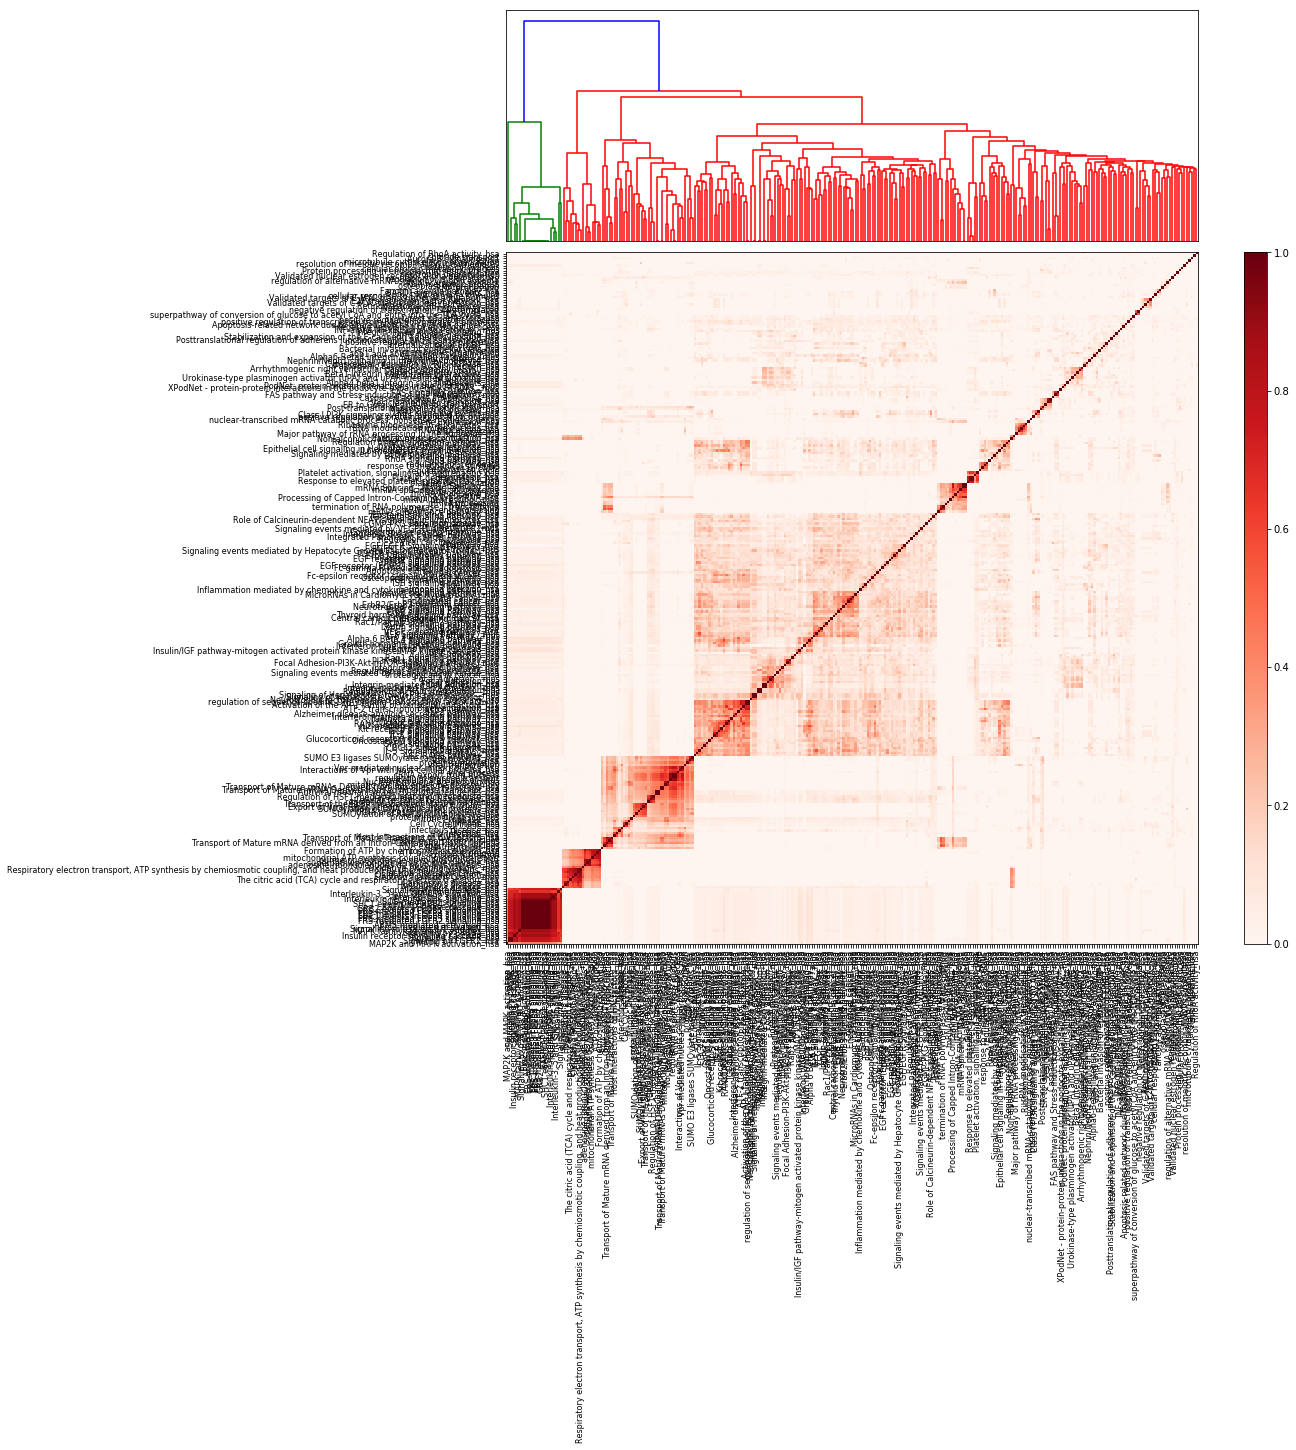

In [71]:
# We can use et.filter_dataframe to select which data to look at
process_dbs = [
        'GO_Biological_Process_2017',
        'Humancyc_2016',
        'Reactome_2016',
        'KEGG_2016',
        'NCI-Nature_2016',
        'Panther_2016',
        'WikiPathways_2016',
]
test = et.filter_dataframe(enrichment_array, 
                           p_value=0.05, # only sig pvalues
                           combined_score=1.0, # score threshold of positive values 
                           db=process_dbs, # Only reactome db
                           category='proteomics_up', # from this category
                           rank=25
                          )
print(test.shape)
dist_matrix2(test, fig_size=(16, 16));

Number of rows went from 100 to 25


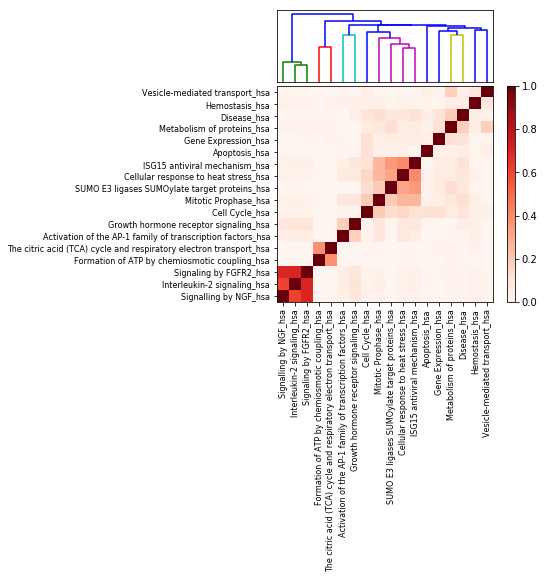

In [70]:
test2 = et.filter_similar_terms(test)
dist_matrix2(test2, fig_size=(5, 5));

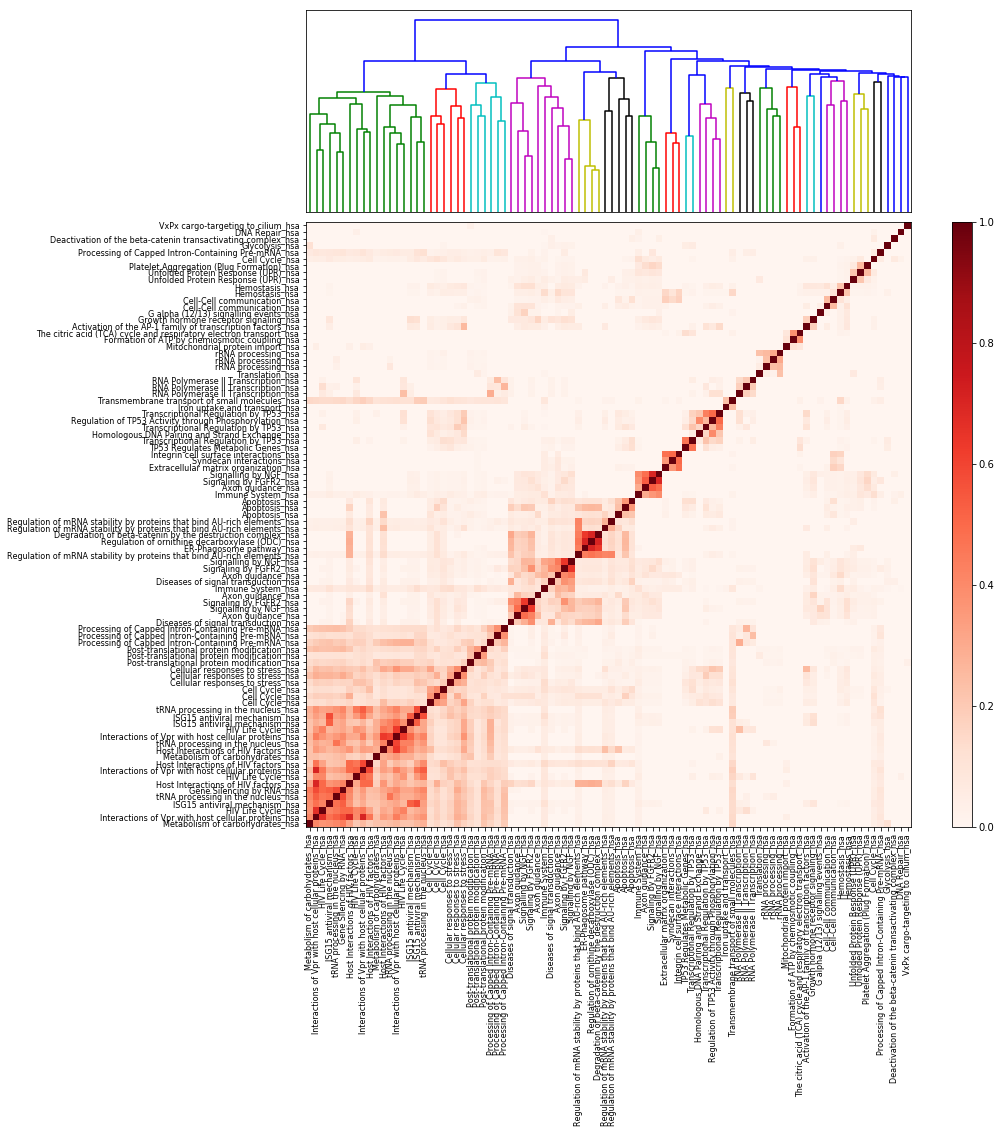

In [51]:
et.dist_matrix(slimmed, fig_size=(14, 14));

In [34]:
print(reactome_only.shape)

at_least_2 = tools.filter_by_minimum_sig_columns(reactome_only, 
                                                 index='term_name', 
                                                 columns='sample_id',
                                                 min_terms=2
                                                )

print(at_least_2.shape)

(556, 10)
(381, 10)


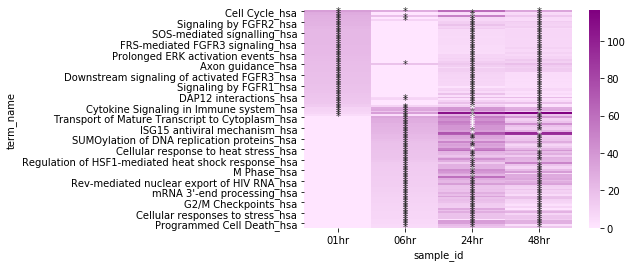

In [35]:
heatmap_from_array(at_least_2, annotate_sig=True);

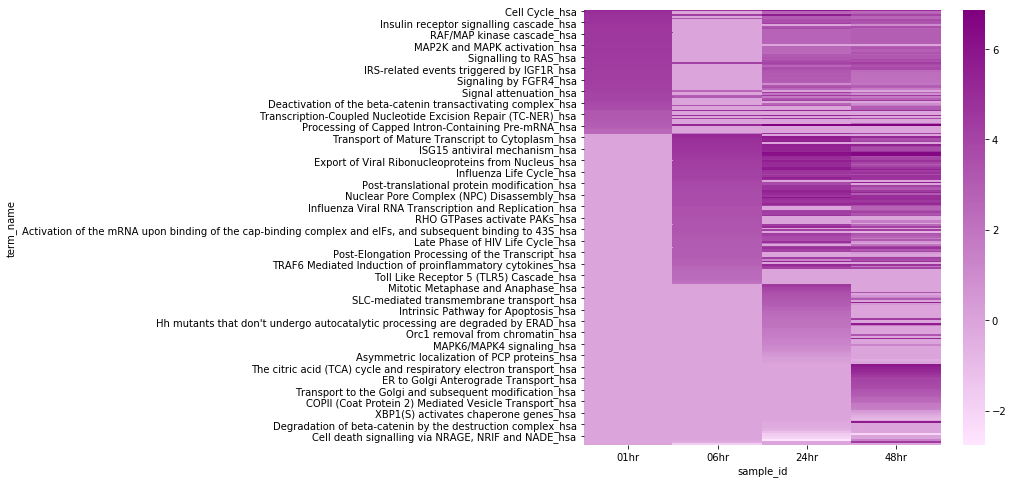

In [18]:
fig = heatmap_from_array(reactome_only,
                         convert_to_log=True,
                         fig_size=(8, 8))

fig.savefig('enrichment.png', dpi=300, bbox_inches='tight')

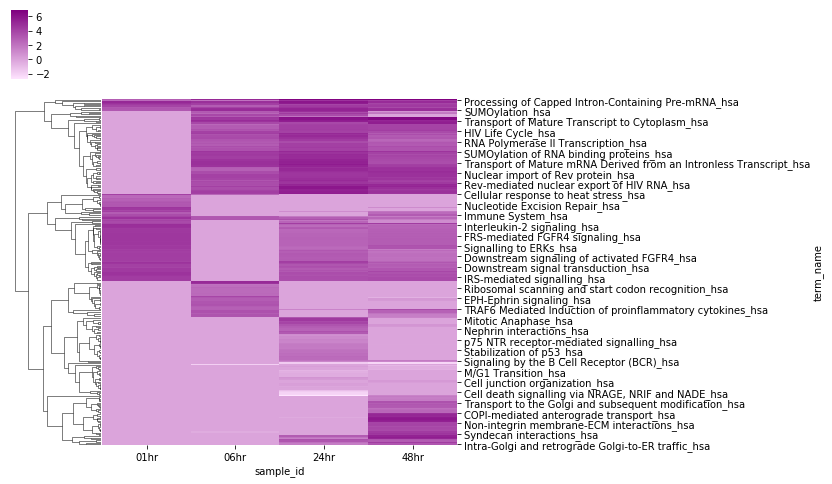

In [19]:

fig = heatmap_from_array(reactome_only, 
                         convert_to_log=True, 
                         cluster_col=False, 
                         cluster_row=True, 
                         fig_size=(8, 8))

fig.savefig('cluster_enrichment.png', dpi=300, bbox_inches='tight')

In [20]:
# lets define a subset of all possible databases to look at.
process_dbs = [
        'GO_Biological_Process_2017',
        'Humancyc_2016',
        'Reactome_2016',
        'KEGG_2016',
        'NCI-Nature_2016',
        'Panther_2016',
        'WikiPathways_2016',
]

drug_dbs = ['DrugMatrix', 'Drug_Perturbations_from_GEO_2014']

In [21]:
drug_df = et.filter_dataframe(enrichment_array, 
                              p_value=0.05,
                              combined_score=0.0,
                              rank=25,
                              db=drug_dbs)
print(drug_df.shape)

(723, 10)


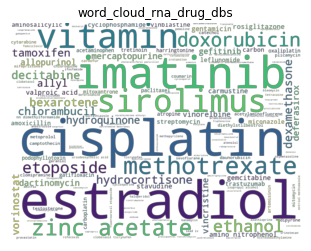

In [22]:
wordcloud_drugs = create_wordcloud(drug_df)
wordcloud_drugs.plot(save_name='word_cloud_rna_drug_dbs')

In [23]:
sig_array = et.filter_dataframe(enrichment_array,
                                p_value=0.05, 
                                combined_score=5.0, 
                                rank=25,
                                db=process_dbs
                               )
print(sig_array.shape)
display(sig_array.head(10))

(1726, 10)


,term_name,rank,combined_score,adj_p_value,genes,n_genes,sample_id,category,db,significant_flag
166954,SRP-dependent cotranslational protein targetin...,1,730.868622,2.468246e-75,"RPL10,RPL10A,RPL11,RPL12,RPL13,RPL13A,RPL15,RP...",72,48hr,proteomics_down,GO_Biological_Process_2017,True
74510,SRP-dependent cotranslational protein targetin...,1,603.684107,1.164942e-61,"RPL10,RPL10A,RPL11,RPL12,RPL13,RPL13A,RPL15,RP...",74,48hr,proteomics_both,GO_Biological_Process_2017,True
166955,"nuclear-transcribed mRNA catabolic process, no...",2,597.367982,9.922860e-62,"CASC3,PPP2R1A,PPP2R2A,PYM1,RPL10,RPL10A,RPL11,...",71,48hr,proteomics_down,GO_Biological_Process_2017,True
74511,"nuclear-transcribed mRNA catabolic process, no...",2,546.358008,3.720681e-56,"CASC3,MAGOHB,NCBP1,PPP2CA,PPP2R1A,PPP2R2A,PYM1...",79,48hr,proteomics_both,GO_Biological_Process_2017,True
143398,SRP-dependent cotranslational protein targetin...,1,501.755701,5.862704e-51,"RPL10,RPL11,RPL12,RPL13,RPL13A,RPL14,RPL17,RPL...",56,24hr,proteomics_down,GO_Biological_Process_2017,True
143399,"nuclear-transcribed mRNA catabolic process, no...",2,466.170447,9.449129e-48,"CASC3,DCP1A,EIF3E,EIF4G1,RPL10,RPL11,RPL12,RPL...",59,24hr,proteomics_down,GO_Biological_Process_2017,True
166956,translational initiation,3,428.244730,1.258290e-60,"EIF2S3,EIF3H,EIF4A2,EIF5,LARP1,RPL10,RPL10A,RP...",71,48hr,proteomics_down,GO_Biological_Process_2017,True
166957,viral transcription,4,425.237579,7.640183e-63,"NUP160,NUP214,NUP85,NUP88,RANBP2,RPL10,RPL10A,...",71,48hr,proteomics_down,GO_Biological_Process_2017,True
166958,rRNA processing,5,393.991452,4.352375e-48,"BYSL,DDX56,LTV1,NOB1,NOLC1,PDCD11,RPL10,RPL10A...",76,48hr,proteomics_down,GO_Biological_Process_2017,True
74512,rRNA processing,3,388.128659,3.248782e-47,"BOP1,BYSL,DDX56,DKC1,FBL,LTV1,NOB1,NOL11,NOLC1...",92,48hr,proteomics_both,GO_Biological_Process_2017,True


In [24]:
sig_array = et.filter_similar_terms(sig_array, threshold=0.7)

Number of rows went from 1726 to 1064


Number of rows went from 363 to 263


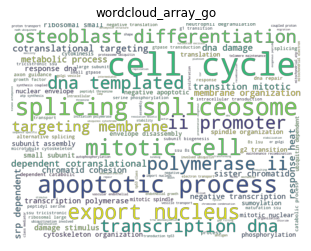

In [25]:
sig_array = et.filter_dataframe(enrichment_array,
                                p_value=0.05, 
                                combined_score=5.0, 
                                rank=25,
                                db='GO_Biological_Process_2017'
                               )
sig_array = et.filter_similar_terms(sig_array, threshold=0.7)
wordcloud = create_wordcloud(sig_array)
wordcloud.plot(save_name='wordcloud_array_go')

Number of rows went from 278 to 258


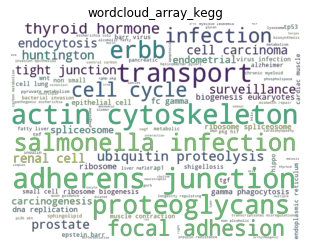

In [26]:
sig_array = et.filter_dataframe(enrichment_array,
                                p_value=0.05, 
                                combined_score=5.0, 
                                rank=25,
                                db='KEGG_2016'
                               )
sig_array = et.filter_similar_terms(sig_array, threshold=0.7)
wordcloud = create_wordcloud(sig_array)
wordcloud.plot(save_name='wordcloud_array_kegg')

Number of rows went from 351 to 282


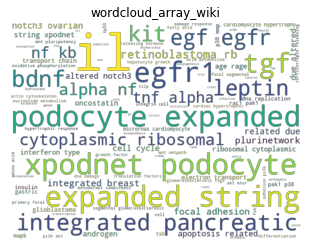

In [27]:
sig_array = et.filter_dataframe(enrichment_array,
                                p_value=0.05, 
                                combined_score=5.0, 
                                rank=25,
                                db='WikiPathways_2016'
                               )
sig_array = et.filter_similar_terms(sig_array, threshold=0.7)
wordcloud = create_wordcloud(sig_array)
wordcloud.plot(save_name='wordcloud_array_wiki')

Number of rows went from 282 to 282


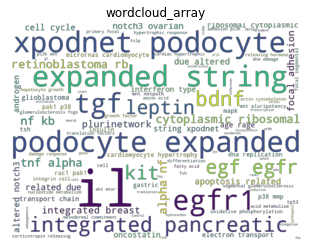

In [28]:
sig_array = et.filter_similar_terms(sig_array, threshold=0.7)
wordcloud = create_wordcloud(sig_array)
wordcloud.plot(save_name='wordcloud_array')

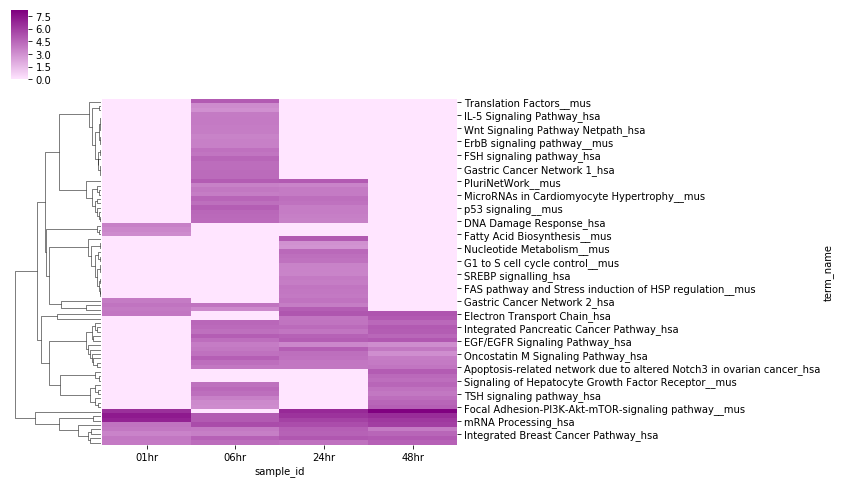

In [29]:
fig = heatmap_from_array(sig_array, 
                         convert_to_log=True, 
                         cluster_col=False, 
                         cluster_row=True, 
                         fig_size=(8, 8))

fig.savefig('enrichment_example3.png', dpi=300, bbox_inches='tight')